# Optimization and Scientific Computing

## Overview
This chapter explores advanced topics in optimization and scientific computing using Julia. We will cover optimization techniques, numerical linear algebra, and scientific computing tools.

## Optimization with Optim.jl

### Introduction to Optim.jl
`Optim.jl` is a package for mathematical optimization in Julia, providing a variety of algorithms to solve optimization problems.

In [22]:

using Pkg
Pkg.add("Optim")

using Optim

# Define the objective function
function rosenbrock(x)
    return (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
end

# Initial guess
x0 = [0.0, 0.0]

# Perform optimization
result = optimize(rosenbrock, x0, BFGS())

# Display results
println("Minimum found at: ", Optim.minimizer(result))
println("Minimum value: ", Optim.minimum(result))


   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [429524aa] + Optim v1.9.4
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Minimum found at: [0.9999999926033533, 0.9999999852005563]
Minimum value: 5.4714165475110124e-17


### Explanation
- **Objective Function**: The Rosenbrock function is a well-known test problem for optimization algorithms.
- **Initial Guess**: Start with an initial guess for the variables.
- **Optimization Algorithm**: Use the BFGS algorithm, a popular quasi-Newton method for optimization.
- **Result**: Print the location of the minimum and the value of the objective function at that point.

## Numerical Linear Algebra with LinearAlgebra.jl

### Introduction to LinearAlgebra.jl
The `LinearAlgebra` standard library in Julia provides a wide range of functionalities for numerical linear algebra.

In [24]:

using LinearAlgebra

# Define a matrix
A = [4.0 1.0; 1.0 3.0]

# Perform LU decomposition
L, U, p = lu(A)
println("L factor: ", L)
println("U factor: ", U)
println("Permutation vector: ", p)

# Solve a linear system Ax = b
b = [1.0, 2.0]
x = A \ b
println("Solution x: ", x)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigen(A)
println("Eigenvalues: ", eigenvalues)
println("Eigenvectors: ", eigenvectors)


L factor: [1.0 0.0; 0.25 1.0]
U factor: [4.0 1.0; 0.0 2.75]
Permutation vector: [1, 2]
Solution x: [0.09090909090909091, 0.6363636363636364]
Eigenvalues: [2.381966011250105, 4.618033988749895]
Eigenvectors: [0.5257311121191335 -0.8506508083520399; -0.8506508083520399 -0.5257311121191335]


### Explanation
- **LU Decomposition**: Factorize a matrix into lower and upper triangular matrices.
- **Solve Linear System**: Solve the system of linear equations Ax = b.
- **Eigenvalues and Eigenvectors**: Compute the eigenvalues and eigenvectors of a matrix.

## Scientific Computing with DifferentialEquations.jl

### Introduction to DifferentialEquations.jl
`DifferentialEquations.jl` is a comprehensive suite for solving differential equations in Julia, supporting a wide range of problem types and solvers.

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


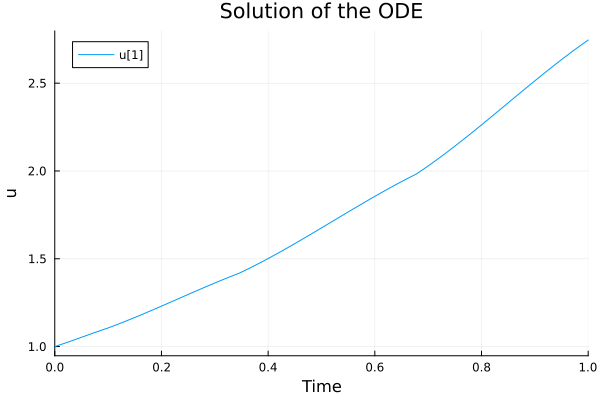

In [28]:

using Pkg
Pkg.add("DifferentialEquations")

using DifferentialEquations

# Define an ordinary differential equation (ODE)
function f(du, u, p, t)
    du .= 1.01 * u
end

# Initial condition
u0 = [1.0]

# Time span
tspan = (0.0, 1.0)

# Define the ODE problem
prob = ODEProblem(f, u0, tspan)

# Solve the ODE
sol = solve(prob)
#println("Solution: ", sol)

# Plot the solution
using Plots
plot(sol, xlabel = "Time", ylabel = "u", title = "Solution of the ODE")


### Explanation
- **ODE Definition**: Define the differential equation.
- **Initial Condition**: Specify the initial condition of the ODE.
- **Time Span**: Define the time span for the solution.
- **Problem Definition**: Create an ODE problem instance.
- **Solve ODE**: Solve the differential equation using a suitable solver.
- **Plot Solution**: Visualize the solution using the `Plots` package.

## Parallel Computing with Distributed.jl

### Introduction to Distributed.jl
`Distributed.jl` is a standard library in Julia for parallel and distributed computing.

In [30]:

using Distributed

# Add worker processes
addprocs(4)

@everywhere begin
    using LinearAlgebra
end

# Define a parallel computation
@distributed (+) for i in 1:1000000
    sqrt(i)
end

# Define a function to be executed in parallel
@everywhere function compute_eigenvalues(A)
    eigen(A).values
end

# Define a matrix
A = rand(100, 100)

# Perform parallel computation
eigenvalues = pmap(compute_eigenvalues, [A for _ in 1:4])
println("Eigenvalues: ", eigenvalues)


Eigenvalues: Vector{ComplexF64}[[-2.8986945966810396 - 0.4727365377205552im, -2.8986945966810396 + 0.4727365377205552im, -2.4881296883043884 - 1.1603134086501212im, -2.4881296883043884 + 1.1603134086501212im, -2.403314835041134 + 0.0im, -2.298719497679211 - 1.5426643706561236im, -2.298719497679211 + 1.5426643706561236im, -2.2499399733934284 - 0.5307354028026658im, -2.2499399733934284 + 0.5307354028026658im, -2.1390101941351576 + 0.0im, -2.071566163977776 - 0.9364750646760079im, -2.071566163977776 + 0.9364750646760079im, -1.9101541065069503 - 1.079808124148152im, -1.9101541065069503 + 1.079808124148152im, -1.637617157690204 - 1.597167085255364im, -1.637617157690204 + 1.597167085255364im, -1.631903157426327 + 0.0im, -1.6287154985155212 - 1.8625471279922672im, -1.6287154985155212 + 1.8625471279922672im, -1.3735210279769832 - 0.9170523667087838im, -1.3735210279769832 + 0.9170523667087838im, -1.344031902871445 + 0.0im, -1.279867910686566 - 2.283591300253im, -1.279867910686566 + 2.2835913002

### Explanation
- **Add Worker Processes**: Add multiple worker processes for parallel computation.
- **Distributed Computation**: Perform a distributed computation using `@distributed` and `pmap`.
- **Define Parallel Function**: Define a function to be executed in parallel across multiple processes.
- **Parallel Execution**: Execute the function in parallel and gather results.

## Conclusion
In this chapter, we covered:
- Optimization with `Optim.jl`
- Numerical linear algebra with `LinearAlgebra.jl`
- Solving differential equations with `DifferentialEquations.jl`
- Parallel computing with `Distributed.jl`

Next, we will explore more advanced topics in scientific computing and visualization with Julia.

## Exercises
Try these exercises to reinforce your understanding:
1. Optimize a different objective function using `Optim.jl`.
2. Perform LU decomposition and solve a linear system using `LinearAlgebra.jl`.
3. Solve a system of differential equations using `DifferentialEquations.jl`.
4. Implement a parallel computation using `Distributed.jl`.
```


# Numerical Linear Algebra and Advanced Plotting

## Overview
This chapter explores advanced numerical linear algebra techniques and advanced plotting methods using Julia. We will cover matrix factorizations, eigenvalue problems, and various advanced plotting techniques.

## Matrix Factorizations with LinearAlgebra.jl

### LU Decomposition
The LU decomposition is used to factorize a matrix into a lower triangular matrix \( L \) and an upper triangular matrix \( U \).

In [38]:

using LinearAlgebra

# Define a matrix
A = [4.0 3.0; 6.0 3.0]

# Perform LU decomposition
LU = lu(A)

# Extract L and U
L = LU.L
U = LU.U
println("L factor: ", L)
println("U factor: ", U)

# Verify the decomposition
println("L * U: ", L * U)
println("Original matrix A: ", A)


L factor: [1.0 0.0; 0.6666666666666666 1.0]
U factor: [6.0 3.0; 0.0 1.0]
L * U: [6.0 3.0; 4.0 3.0]
Original matrix A: [4.0 3.0; 6.0 3.0]


### Explanation
- **LU Decomposition**: Decompose matrix \( A \) into \( L \) and \( U \).
- **Verification**: Verify that \( A = L \times U \).

### QR Decomposition
The QR decomposition is used to factorize a matrix into an orthogonal matrix \( Q \) and an upper triangular matrix \( R \).

In [40]:

# Define a matrix
B = [12.0 -51.0 4.0; 6.0 167.0 -68.0; -4.0 24.0 -41.0]

# Perform QR decomposition
Q, R = qr(B)

println("Q factor: ", Q)
println("R factor: ", R)

# Verify the decomposition
println("Q * R: ", Q * R)
println("Original matrix B: ", B)


Q factor: LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([-14.0 -21.0 14.000000000000002; 0.23076923076923078 -175.00000000000003 70.00000000000001; -0.15384615384615385 0.055555555555555546 -35.0], [1.8571428571428572 -0.822857142857143 0.0; 0.0 1.9938461538461538 0.0; 0.0 0.0 0.0])
R factor: [-14.0 -21.0 14.000000000000002; 0.0 -175.00000000000003 70.00000000000001; 0.0 0.0 -35.0]
Q * R: [12.0 -51.00000000000003 4.000000000000007; 6.0 167.00000000000003 -68.00000000000004; -4.0 24.000000000000004 -41.0]
Original matrix B: [12.0 -51.0 4.0; 6.0 167.0 -68.0; -4.0 24.0 -41.0]


### Explanation
- **QR Decomposition**: Decompose matrix \( B \) into \( Q \) and \( R \).
- **Verification**: Verify that \( B = Q \times R \).

### Singular Value Decomposition (SVD)
The SVD is used to factorize a matrix into three matrices \( U \), \( \Sigma \), and \( V \) such that \( A = U \Sigma V^T \).

In [42]:

# Define a matrix
C = [1.0 0.0 0.0 0.0 2.0; 0.0 0.0 3.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0; 0.0 4.0 0.0 0.0 0.0]

# Perform SVD
U, Σ, V = svd(C)

println("U matrix: ", U)
println("Σ vector: ", Σ)
println("V matrix: ", V)

# Verify the decomposition
println("U * Diagonal(Σ) * V': ", U * Diagonal(Σ) * V')
println("Original matrix C: ", C)


U matrix: [0.0 0.0 1.0 0.0; 0.0 1.0 0.0 0.0; 0.0 0.0 0.0 1.0; -1.0 0.0 0.0 0.0]
Σ vector: [4.0, 3.0, 2.23606797749979, 0.0]
V matrix: [0.0 -0.0 0.44721359549995787 0.0; -1.0 0.0 -0.0 0.0; 0.0 1.0 -0.0 0.0; 0.0 -0.0 -0.0 1.0; 0.0 0.0 0.8944271909999157 0.0]
U * Diagonal(Σ) * V': [0.9999999999999999 0.0 0.0 0.0 1.9999999999999998; 0.0 0.0 3.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0; 0.0 4.0 0.0 0.0 0.0]
Original matrix C: [1.0 0.0 0.0 0.0 2.0; 0.0 0.0 3.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0; 0.0 4.0 0.0 0.0 0.0]


### Explanation
- **SVD**: Decompose matrix \( C \) into \( U \), \( \Sigma \), and \( V \).
- **Verification**: Verify that \( C = U \Sigma V^T \).

## Eigenvalue and Eigenvector Computation

### Eigenvalues and Eigenvectors
Compute the eigenvalues and eigenvectors of a matrix.

In [44]:

# Define a matrix
D = [2.0 -1.0 0.0; -1.0 2.0 -1.0; 0.0 -1.0 2.0]

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigen(D)

println("Eigenvalues: ", eigenvalues)
println("Eigenvectors: ", eigenvectors)

# Verify the decomposition
println("D * eigenvectors: ", D * eigenvectors)
println("eigenvectors * Diagonal(eigenvalues): ", eigenvectors * Diagonal(eigenvalues))


Eigenvalues: [0.5857864376269073, 2.0000000000000018, 3.414213562373095]
Eigenvectors: [0.5000000000000009 0.7071067811865468 -0.5000000000000001; 0.7071067811865476 -4.710277376051338e-16 0.7071067811865475; 0.4999999999999991 -0.7071067811865482 -0.4999999999999999]
D * eigenvectors: [0.2928932188134542 1.414213562373094 -1.7071067811865477; 0.41421356237309515 5.551115123125783e-16 2.414213562373095; 0.29289321881345065 -1.414213562373096 -1.7071067811865472]
eigenvectors * Diagonal(eigenvalues): [0.29289321881345415 1.414213562373095 -1.707106781186548; 0.41421356237309676 -9.420554752102683e-16 2.414213562373095; 0.29289321881345315 -1.4142135623730978 -1.707106781186547]


### Explanation
- **Eigenvalues and Eigenvectors**: Compute the eigenvalues and eigenvectors of matrix \( D \).
- **Verification**: Verify that \( D \times \text{eigenvectors} = \text{eigenvectors} \times \text{Diagonal(eigenvalues)} \).

## Advanced Plotting with Makie.jl

### 3D Surface Plots
Create detailed and interactive 3D surface plots.

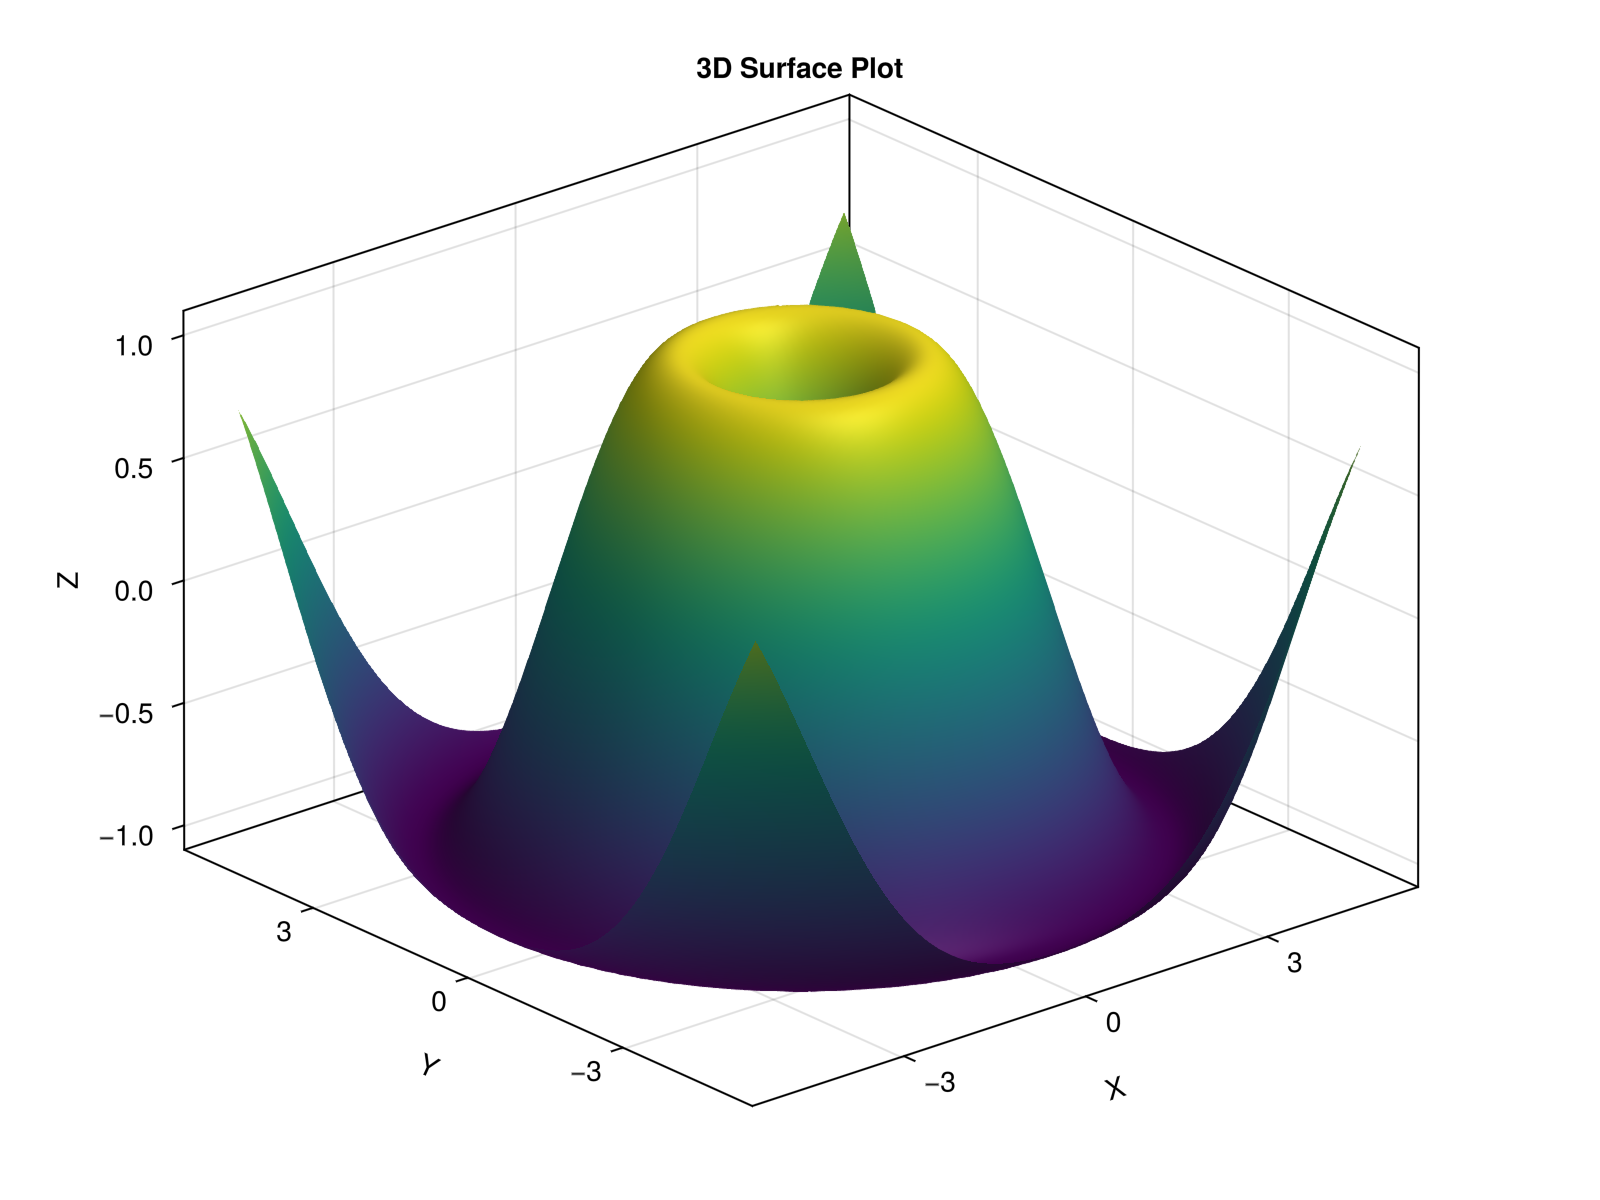

In [66]:
#using Pkg
#Pkg.add("GLMakie")

using GLMakie: surface!

# Create a 3D surface plot
fig = Figure(size = (800, 600))
ax = Axis3(fig[1, 1], title = "3D Surface Plot", xlabel = "X", ylabel = "Y", zlabel = "Z")
x = LinRange(-5, 5, 100)
y = LinRange(-5, 5, 100)
z = [sin(sqrt(xi^2 + yi^2)) for xi in x, yi in y]
surface!(ax, x, y, z, colormap = :viridis)
fig


### Explanation
- **3D Surface Plot**: Visualize a 3D surface using `surface!`.

### Contour Plots
Create detailed contour plots to visualize functions.

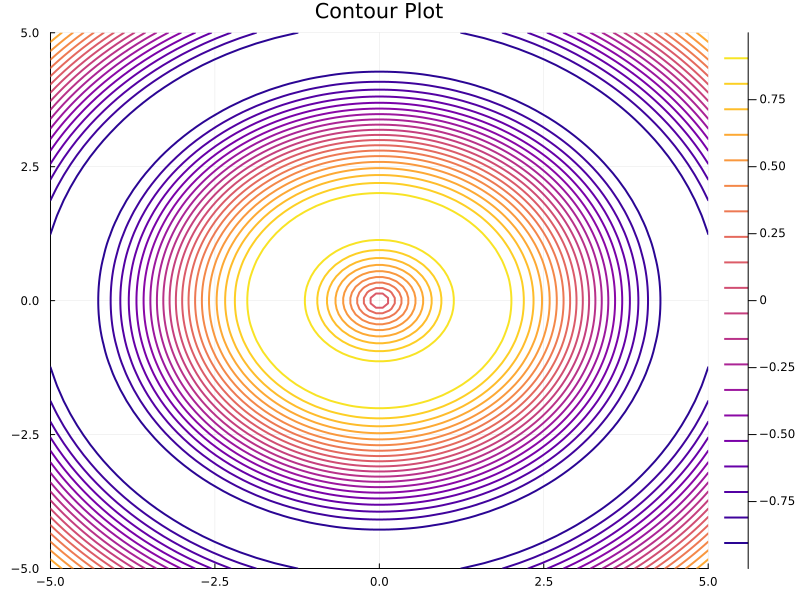

In [70]:
# Assuming you are using Plots.jl library for creating contour plots
using Plots

# Create a contour plot
fig = plot(x, y, z, st = :contour, levels = 20, linewidth = 2, color = :plasma, title = "Contour Plot", size = (800, 600))

### Explanation
- **Contour Plot**: Visualize a function using `contour!`.

### Heatmaps
Create heatmaps for matrix data visualization.

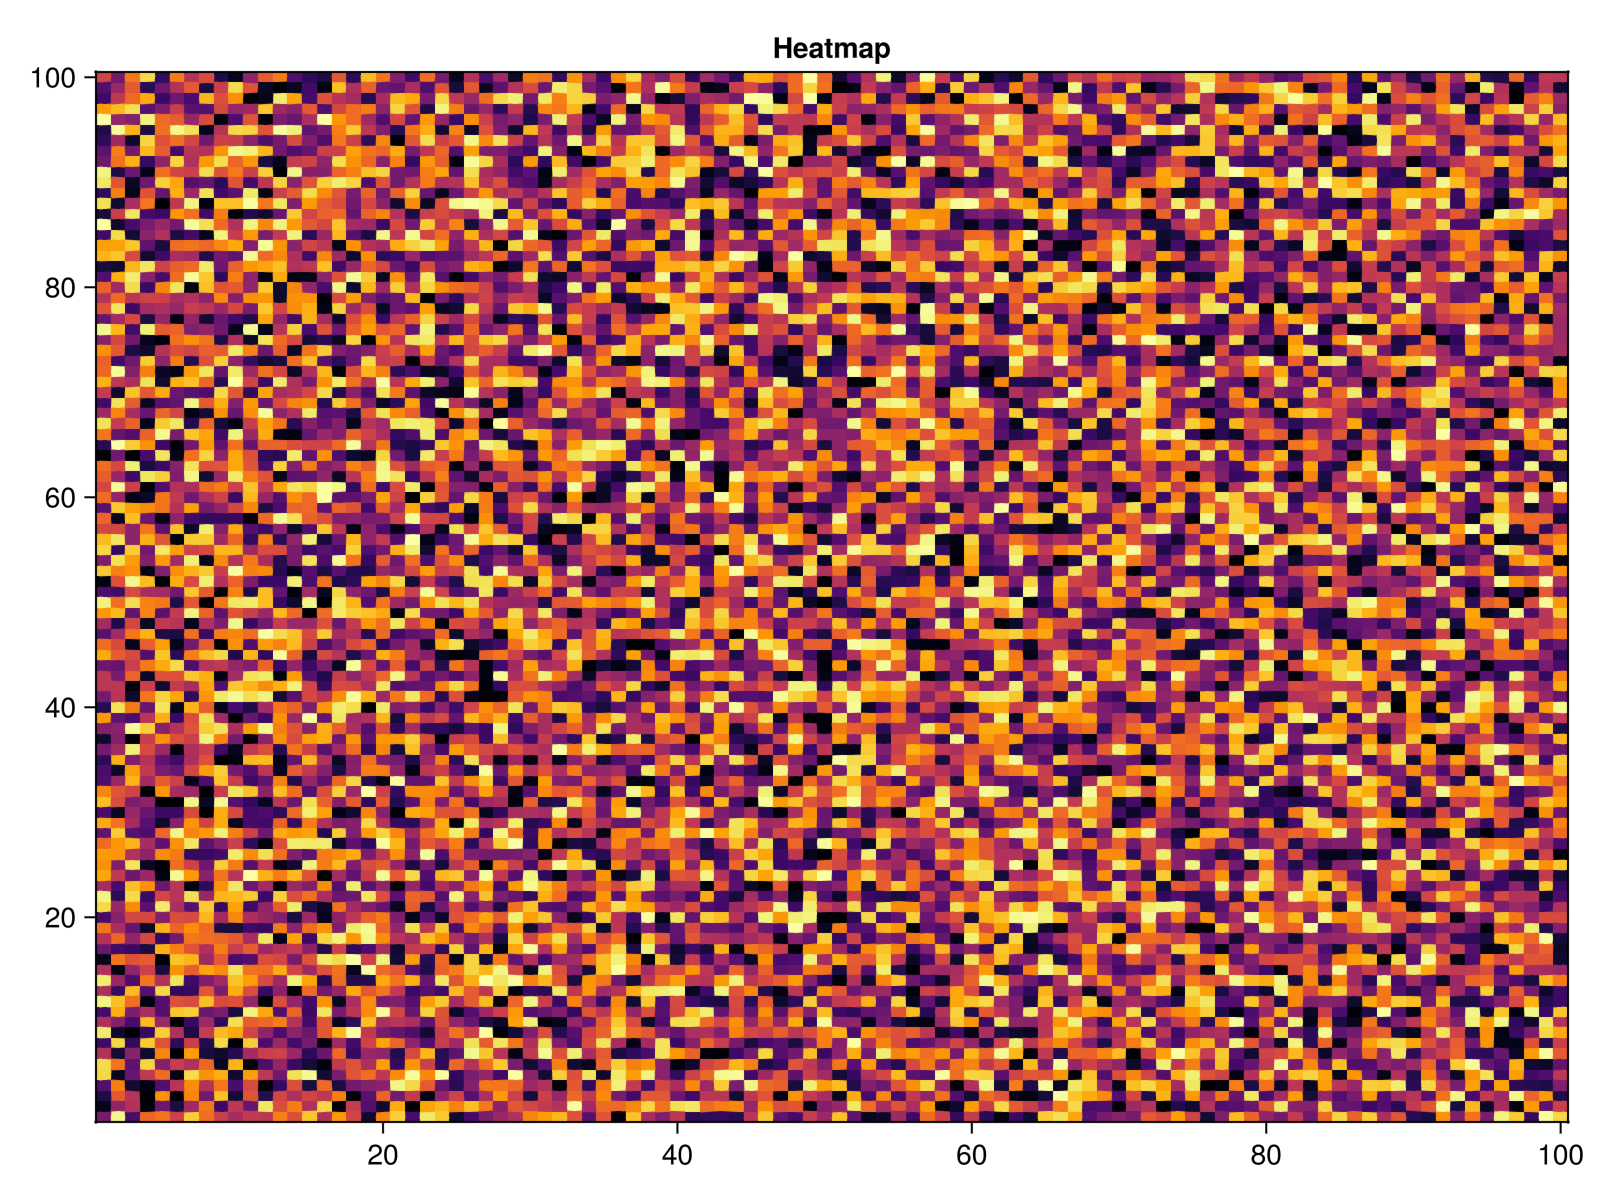

In [74]:
using GLMakie: heatmap!
# Create a heatmap
fig = Figure(size = (800, 600))
ax = Axis(fig[1, 1], title = "Heatmap")
heatmap!(ax, rand(100, 100), colormap = :inferno)
fig


### Explanation
- **Heatmap**: Visualize matrix data using `heatmap!`.

### Interactive Scatter Plots
Create interactive scatter plots for exploring data points.

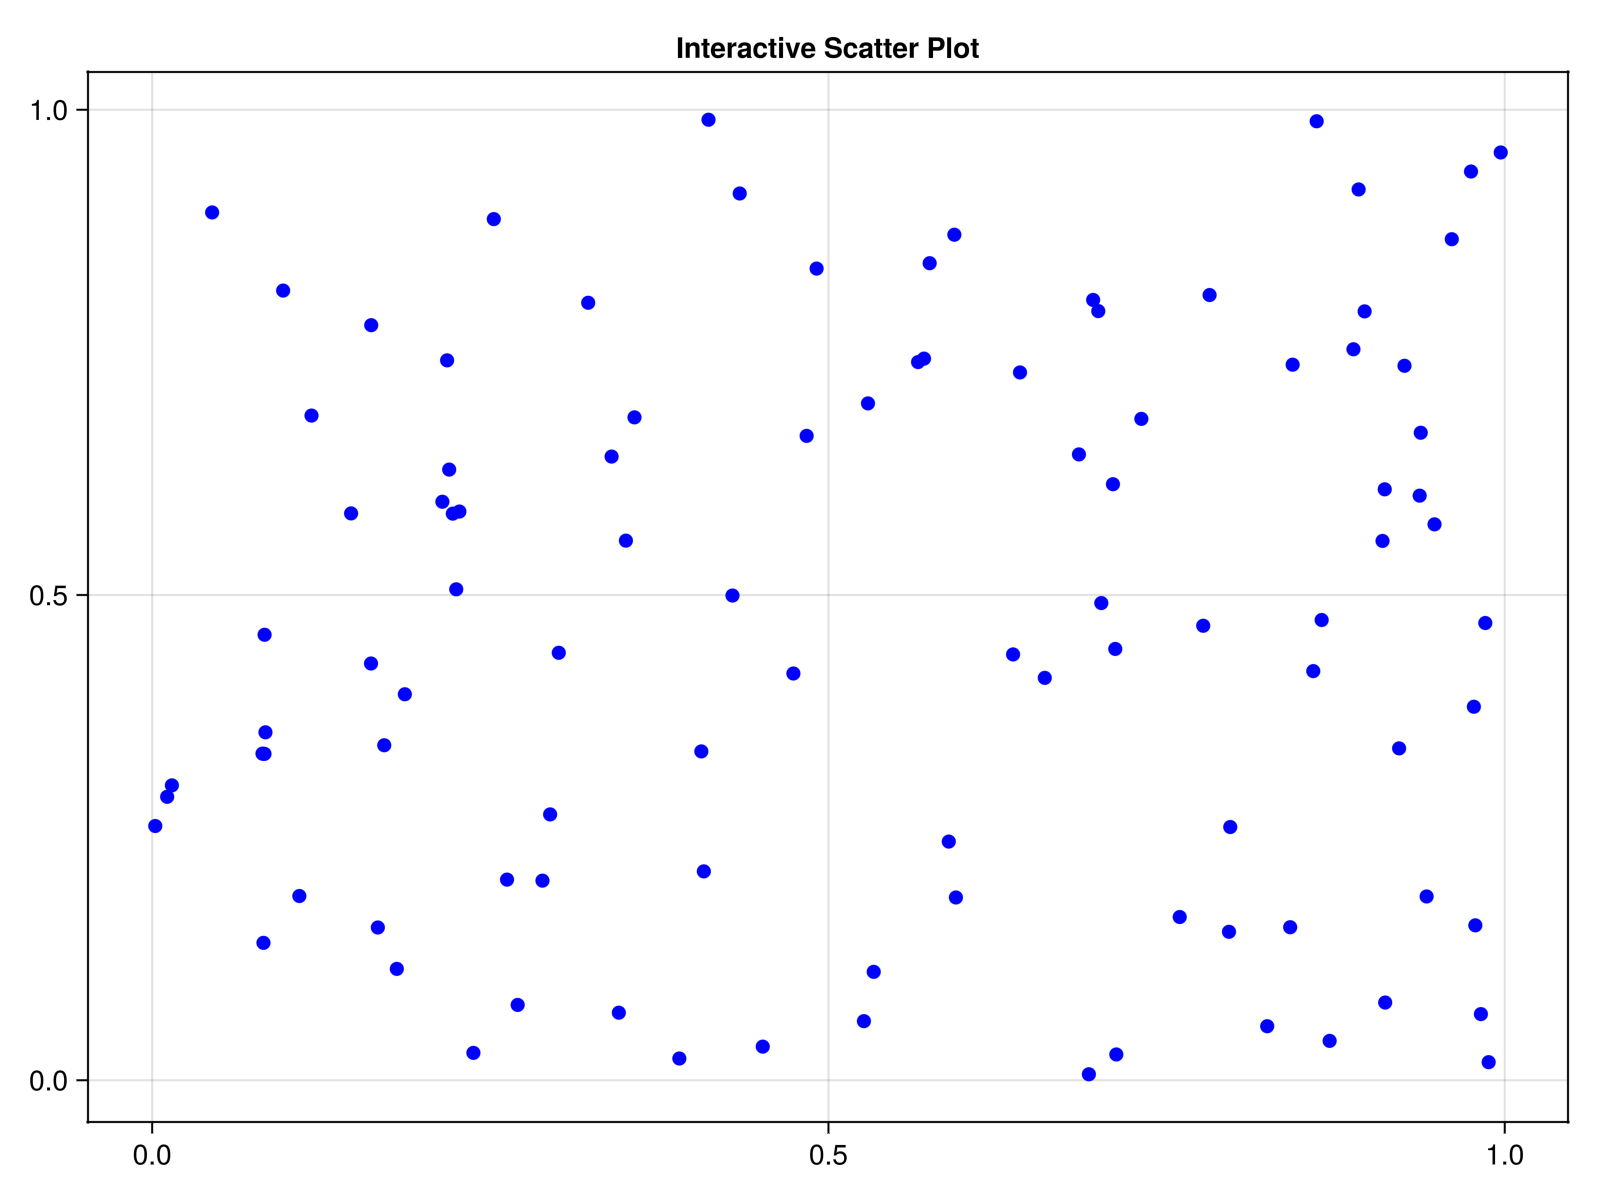

In [78]:
using GLMakie: scatter!
# Create an interactive scatter plot
fig = Figure(size = (800, 600))
ax = Axis(fig[1, 1], title = "Interactive Scatter Plot")
scatter!(ax, rand(100), rand(100), markersize = 10, color = :blue)
fig


### Explanation
- **Interactive Scatter Plot**: Create an interactive scatter plot to explore data points.

## Conclusion
In this chapter, we covered:
- Matrix factorizations (LU, QR, SVD)
- Eigenvalue and eigenvector computation
- Advanced plotting techniques with `Makie.jl`

Next, we will explore more specialized topics in machine learning, scientific computing, and advanced Julia programming techniques.

## Exercises
Try these exercises to reinforce your understanding:
1. Perform LU decomposition on a different matrix and verify the result.
2. Compute the QR decomposition of a given matrix and verify the result.
3. Perform SVD on another matrix and check the decomposition.
4. Calculate the eigenvalues and eigenvectors of a different matrix.
5. Create various types of plots (surface, contour, heatmap, scatter) using `Makie.jl` with different datasets.
